# London Crime by LSOA

Nama: Windy Mega Melani
<br>
Code: PYTN-KS04-003
<br>
Python for Data Science

# Data Preparation

In [19]:
#Memasukkan library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from PIL import Image
import folium

In [20]:
#Membaca data london crime by lsoa
df=pd.read_csv('london_crime_by_lsoa.csv')

In [21]:
#Mengurutkan data berdasarkan tahun
df.sort_values(by='year', ascending=True, axis=0, inplace=True)

In [22]:
#Membuat df1 khusus untuk value yang bernilai 1
df1=df[df["value"] == 1]
df1

lsoa_code                 borough               major_category  \
2874646   E01003986               Southwark                      Robbery   
8512166   E01000928                  Camden              Criminal Damage   
8512202   E01001995                Haringey  Violence Against the Person   
1315554   E01001876  Hammersmith and Fulham              Criminal Damage   
2874608   E01002180                  Harrow                     Burglary   
...             ...                     ...                          ...   
6171000   E01000664                 Bromley                      Robbery   
11948672  E01004426          Waltham Forest           Theft and Handling   
6171333   E01002182                  Harrow           Theft and Handling   
6171393   E01000439                  Bexley           Theft and Handling   
6171475   E01001309                  Ealing           Theft and Handling   

                       minor_category  value  year  month  
2874646             Business Property      1  2008      7  
8512166         Other Criminal Damage      1  2008      9  
8512202                    Harassment      1  2008      7  
1315554         Other Criminal Damage      1  2008      1  
2874608        Burglary in a Dwelling      1  2008      2  
...                               ...    ...   ...    ...  
6171000             Personal Property      1  2016      3  
11948672           Other Theft Person      1  2016     10  
6171333              Theft From Shops      1  2016      8  
6171393   Theft/Taking of Pedal Cycle      1  2016     12  
6171475                   Other Theft      1  2016      5  

[2141789 rows x 7 columns]

In [23]:
#Menampilkan 5 data teratas
df1.head()

lsoa_code                 borough               major_category  \
2874646  E01003986               Southwark                      Robbery   
8512166  E01000928                  Camden              Criminal Damage   
8512202  E01001995                Haringey  Violence Against the Person   
1315554  E01001876  Hammersmith and Fulham              Criminal Damage   
2874608  E01002180                  Harrow                     Burglary   

                 minor_category  value  year  month  
2874646       Business Property      1  2008      7  
8512166   Other Criminal Damage      1  2008      9  
8512202              Harassment      1  2008      7  
1315554   Other Criminal Damage      1  2008      1  
2874608  Burglary in a Dwelling      1  2008      2

In [24]:
#Menampilkan 5 data terakhir
df1.tail()

lsoa_code         borough      major_category  \
6171000   E01000664         Bromley             Robbery   
11948672  E01004426  Waltham Forest  Theft and Handling   
6171333   E01002182          Harrow  Theft and Handling   
6171393   E01000439          Bexley  Theft and Handling   
6171475   E01001309          Ealing  Theft and Handling   

                       minor_category  value  year  month  
6171000             Personal Property      1  2016      3  
11948672           Other Theft Person      1  2016     10  
6171333              Theft From Shops      1  2016      8  
6171393   Theft/Taking of Pedal Cycle      1  2016     12  
6171475                   Other Theft      1  2016      5

In [25]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2141789 entries, 2874646 to 6171475
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   lsoa_code       object
 1   borough         object
 2   major_category  object
 3   minor_category  object
 4   value           int64 
 5   year            int64 
 6   month           int64 
dtypes: int64(3), object(4)
memory usage: 130.7+ MB


In [26]:
#Menampilkan kolom yang ada pada df1
df1.columns.values

array(['lsoa_code', 'borough', 'major_category', 'minor_category',
       'value', 'year', 'month'], dtype=object)

In [27]:
#Menampilkan total baris dan kolom
df1.shape

(2141789, 7)

In [28]:
df1.isnull().sum()

lsoa_code         0
borough           0
major_category    0
minor_category    0
value             0
year              0
month             0
dtype: int64

In [29]:
df1.describe()

value          year         month
count  2141789.0  2.141789e+06  2.141789e+06
mean         1.0  2.012015e+03  6.507797e+00
std          0.0  2.599081e+00  3.425987e+00
min          1.0  2.008000e+03  1.000000e+00
25%          1.0  2.010000e+03  4.000000e+00
50%          1.0  2.012000e+03  7.000000e+00
75%          1.0  2.014000e+03  9.000000e+00
max          1.0  2.016000e+03  1.200000e+01

In [30]:
#Melihat total kejahatan berdasarkan tahun
df1["year"].value_counts()

2016    246170
2015    241347
2008    240966
2009    238097
2014    237515
2010    235513
2011    234747
2012    234714
2013    232720
Name: year, dtype: int64

In [31]:
#Melihat total kejahatan besar berdasarkan kategori
totalmajor = df1['major_category'].value_counts()
totalmajor

Theft and Handling             662379
Violence Against the Person    544226
Criminal Damage                353769
Burglary                       263035
Drugs                          138878
Robbery                        110785
Other Notifiable Offences       65925
Fraud or Forgery                 1835
Sexual Offences                   957
Name: major_category, dtype: int64

In [32]:
#Melihat total kejahatan kecil berdasarkan kategori
totalminor = df1['minor_category'].value_counts()
totalminor

Burglary in a Dwelling                    154845
Theft From Motor Vehicle                  151633
Assault with Injury                       138647
Other Theft                               136743
Common Assault                            135116
Harassment                                135016
Criminal Damage To Motor Vehicle          124756
Theft/Taking Of Motor Vehicle             122568
Possession Of Drugs                       112104
Burglary in Other Buildings               108190
Criminal Damage To Dwelling                96217
Personal Property                          92874
Other Criminal Damage                      88923
Other Theft Person                         77223
Theft/Taking of Pedal Cycle                72838
Wounding/GBH                               68261
Other Notifiable                           61176
Theft From Shops                           45207
Criminal Damage To Other Building          43873
Motor Vehicle Interference & Tampering     42866
Other violence      

In [34]:
#Menampilkan total kejahatan besar berdasarkan kategori per tahun dalam bentuk tabel
major = df1.pivot_table(values='value', index=['year'],columns=['major_category'], aggfunc=np.sum, fill_value=0)
major

major_category  Burglary  Criminal Damage  Drugs  Fraud or Forgery  \
year                                                                 
2008               29367            44774  15568              1835   
2009               29193            43518  15686                 0   
2010               29471            41800  15863                 0   
2011               29513            40220  16121                 0   
2012               30222            37425  15845                 0   
2013               30037            34805  15980                 0   
2014               29071            36118  15286                 0   
2015               28299            37394  14432                 0   
2016               27862            37715  14097                 0   

major_category  Other Notifiable Offences  Robbery  Sexual Offences  \
year                                                                  
2008                                 6452    13099              957   
2009                                 6587    12889                0   
2010                                 6813    13241                0   
2011                                 6476    13584                0   
2012                                 6910    13515                0   
2013                                 6882    12524                0   
2014                                 7961    10725                0   
2015                                 8493    10553                0   
2016                                 9351    10655                0   

major_category  Theft and Handling  Violence Against the Person  
year                                                             
2008                         72182                        56732  
2009                         72672                        57552  
2010                         72437                        55888  
2011                         74065                        54768  
2012                         74317                        56480  
2013                         72411                        60081  
2014                         73009                        65345  
2015                         74252                        67924  
2016                         77034                        69456

In [36]:
#Menampilkan total kejahatan kecil berdasarkan kategori per tahun dalam bentuk tabel
minor = df1.pivot_table(values='value', index=['year'],columns=['minor_category'], aggfunc=np.sum, fill_value=0)
minor

minor_category  Assault with Injury  Burglary in Other Buildings  \
year                                                               
2008                          15104                        12594   
2009                          15424                        12421   
2010                          15249                        12390   
2011                          15170                        12442   
2012                          15459                        12737   
2013                          14993                        12210   
2014                          15644                        11481   
2015                          15687                        11079   
2016                          15917                        10836   

minor_category  Burglary in a Dwelling  Business Property  Common Assault  \
year                                                                        
2008                             16773               2432           14347   
2009                             16772               2579           14511   
2010                             17081               2504           14707   
2011                             17071               2213           14554   
2012                             17485               2070           14696   
2013                             17827               1739           14633   
2014                             17590               1431           15614   
2015                             17220               1525           15949   
2016                             17026               1418           16105   

minor_category  Counted per Victim  Criminal Damage To Dwelling  \
year                                                              
2008                           983                        12663   
2009                             0                        12386   
2010                             0                        11794   
2011                             0                        11351   
2012                             0                        10238   
2013                             0                         9352   
2014                             0                         9428   
2015                             0                         9423   
2016                             0                         9582   

minor_category  Criminal Damage To Motor Vehicle  \
year                                               
2008                                       15822   
2009                                       15114   
2010                                       14626   
2011                                       14186   
2012                                       13229   
2013                                       12445   
2014                                       12777   
2015                                       13295   
2016                                       13262   

minor_category  Criminal Damage To Other Building  Drug Trafficking  ...  \
year                                                                 ...   
2008                                         5873              2648  ...   
2009                                         5528              2695  ...   
2010                                         5220              2781  ...   
2011                                         4952              2806  ...   
2012                                         4628              2788  ...   
2013                                         4409              2728  ...   
2014                                         4429              2644  ...   
2015                                         4442              2507  ...   
2016                                         4392              2461  ...   

minor_category  Other Theft Person  Other violence  Personal Property  \
year                                                                    
2008                          7812            3881              10667   
2009                          8199  

# Visualisasi Data

## Area Plots

<b>Soal:</b> Kategori kejahatan besar di London tahun 2008 - 2016

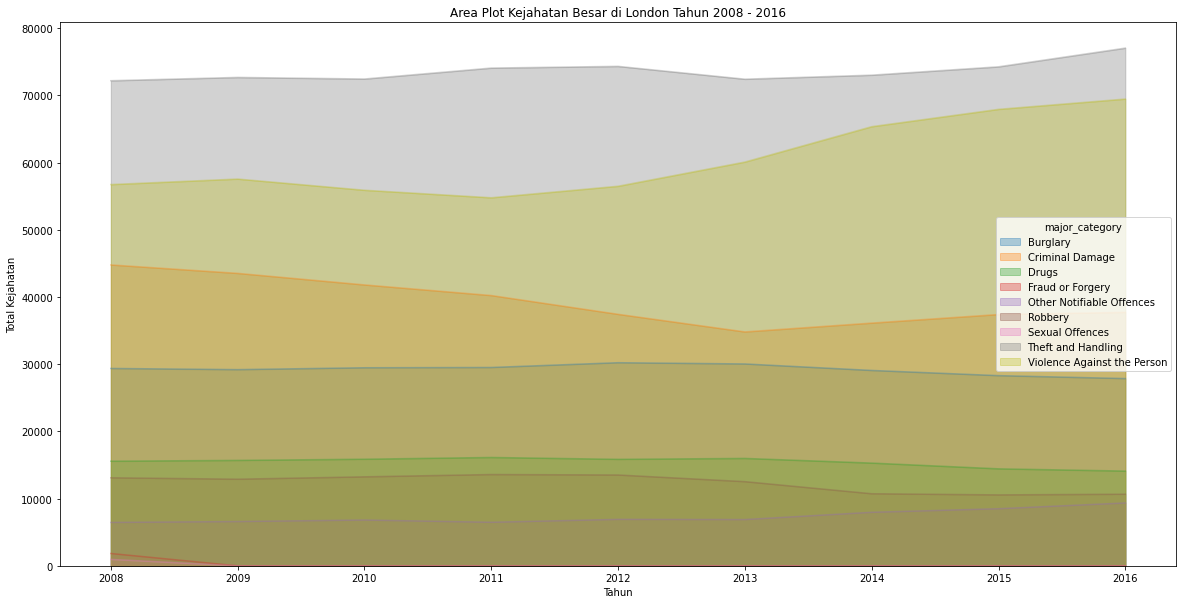

In [35]:
major.plot(kind='area',
           alpha=0.35,
           stacked=False,
           figsize=(20, 10),
          )

plt.title('Area Plot Kejahatan Besar di London Tahun 2008 - 2016')
plt.ylabel('Total Kejahatan') 
plt.xlabel('Tahun') 

plt.show()

Dapat disimpulkan bahwa kejahatan besar yang paling sering terjadi adalah Theft and Handling dengan total kejahatan lebih dari 60000. 

## Histograms

<b>Soal:</b> Kejahatan besar di London yang paling banyak dan paling sedikit dari tahun 2008 - 2016 dalam bentuk histogram!

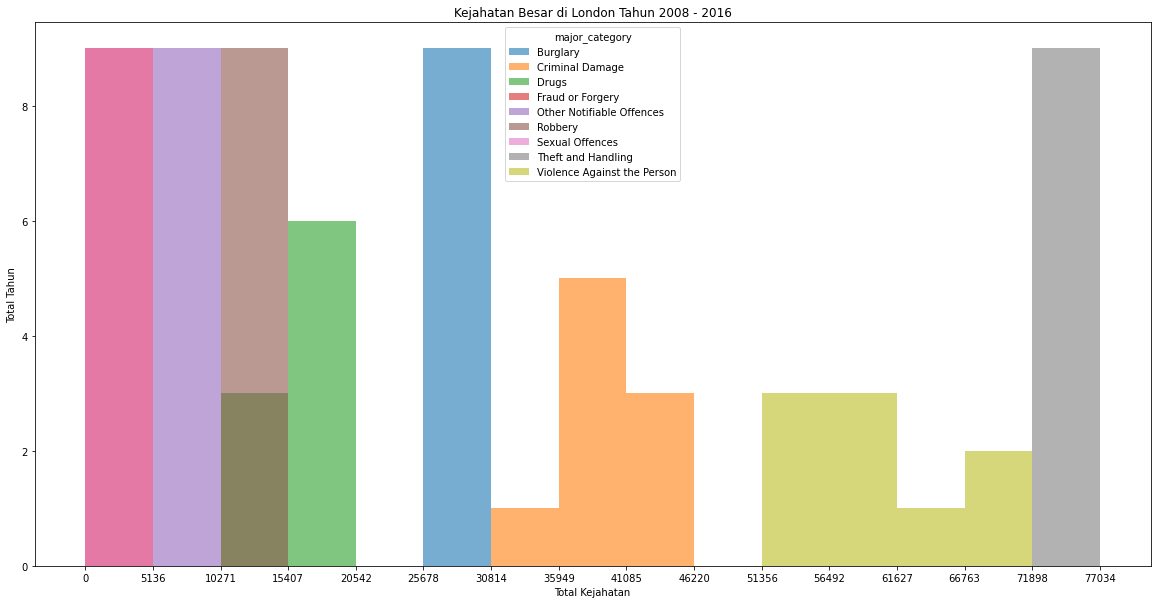

In [86]:
count, bin_edges = np.histogram(major, 15)
major.plot(kind ='hist',
figsize=(20, 10),
bins=15,
alpha=0.6,
xticks=bin_edges,
)

plt.title('Kejahatan Besar di London Tahun 2008 - 2016') 
plt.ylabel('Total Tahun') 
plt.xlabel('Total Kejahatan')

plt.show()

Kejahatan besar paling banyak di London tahun 2008 - 2016 adalah "Theft and Handling". Sedangkan kejahatan besar paling sedikit adalah "Sexual Offences".

## Bar Charts

<b>Soal:</b> Kasus kejahatan di City of London pada tahun 2016

In [62]:
df2016 = df1[["borough", "major_category", "minor_category","year","month","value"]][df1.year == 2016]

# Cek Data
df2016

borough               major_category  \
3165737         Haringey                     Burglary   
485045            Newham                     Burglary   
62224          Redbridge  Violence Against the Person   
3195973      Westminster                      Robbery   
13480194          Merton              Criminal Damage   
...                  ...                          ...   
6171000          Bromley                      Robbery   
11948672  Waltham Forest           Theft and Handling   
6171333           Harrow           Theft and Handling   
6171393           Bexley           Theft and Handling   
6171475           Ealing           Theft and Handling   

                            minor_category  year  month  value  
3165737        Burglary in Other Buildings  2016      2      1  
485045              Burglary in a Dwelling  2016      6      1  
62224                         Wounding/GBH  2016      7      1  
3195973                  Business Property  2016     12      1  
13480194  Criminal Damage To Motor Vehicle  2016      7      1  
...                                    ...   ...    ...    ...  
6171000                  Personal Property  2016      3      1  
11948672                Other Theft Person  2016     10      1  
6171333                   Theft From Shops  2016      8      1  
6171393        Theft/Taking of Pedal Cycle  2016     12      1  
6171475                        Other Theft  2016      5      1  

[246170 rows x 6 columns]

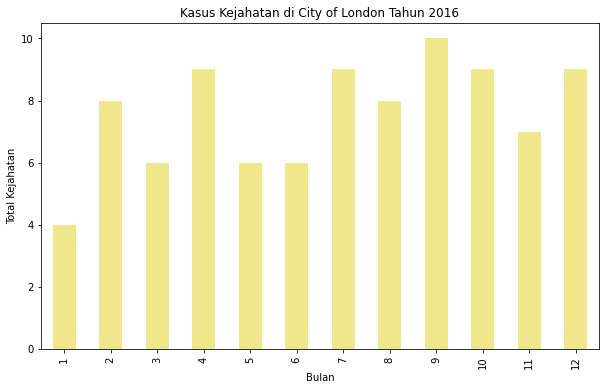

In [96]:
barborough = df2016.pivot_table(values='value', index=['month'],columns=['borough'], aggfunc=np.sum, fill_value=0)
dfbarborough = barborough['City of London']
dfbarborough.plot(kind='bar', figsize=(10,6), color='khaki')

plt.xlabel('Bulan')
plt.ylabel('Total Kejahatan')
plt.title('Kasus Kejahatan di City of London Tahun 2016')

plt.show()

Dapat disimpulkan bahwa kejahatan di City of London tahun 2016 terjadi paling banyak pada bulan ke-9 dan paling sedikit pada bulan pertama.

<b>Soal:</b> Wilayah di London dengan kasus kejahatan paling banyak tahun 2008 - 2016

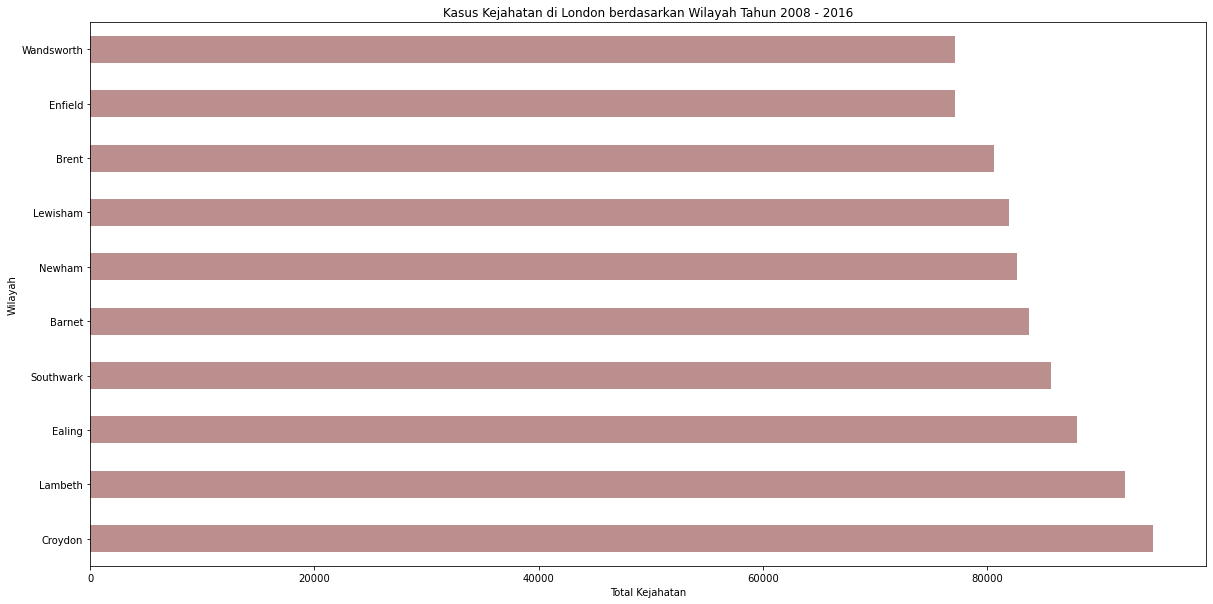

In [98]:
totalborough = df1['borough'].value_counts()
barh=totalborough[0:10]

barh.plot(kind='barh', figsize=(20,10), color='rosybrown')

plt.xlabel('Total Kejahatan')
plt.ylabel('Wilayah')
plt.title('Kasus Kejahatan di London berdasarkan Wilayah Tahun 2008 - 2016')

plt.show()

Dapat disimpulkan bahwa wilayah Croydon adalah wilayah dengan kasus kejahatan paling banyak dari tahun 2008 sampai 2016 dengan total kasus lebih dari 90000.

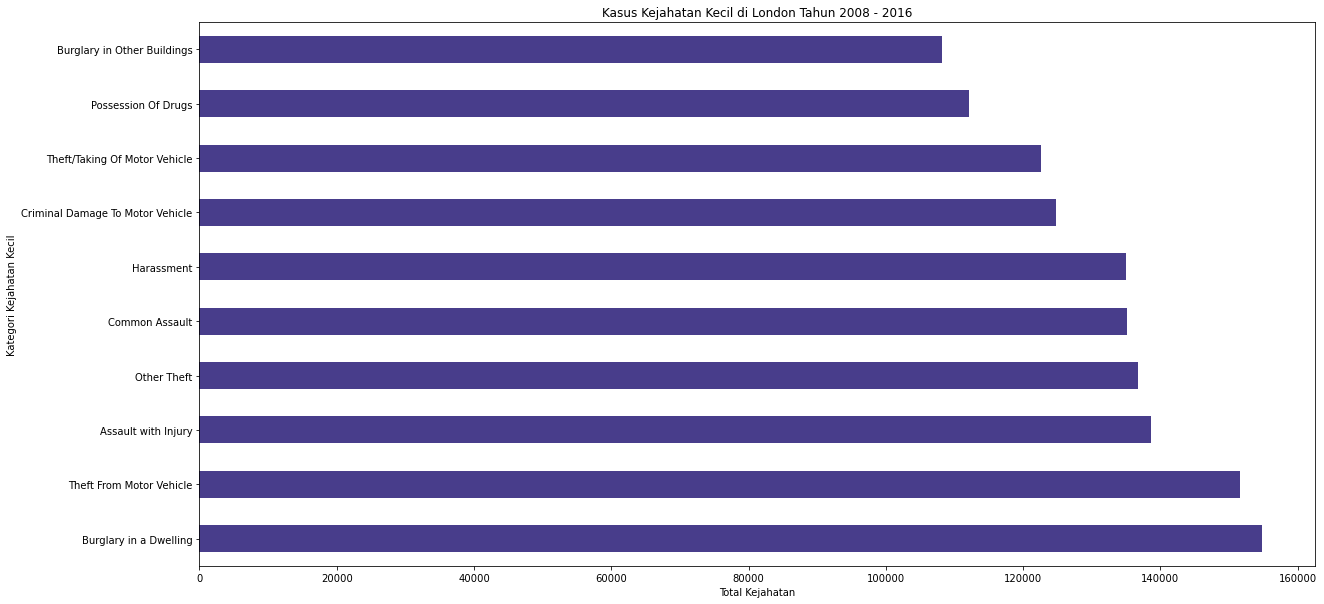

In [91]:
minor1 = df1['minor_category'].value_counts()
minor2=minor1[0:10]

minor2.plot(kind='barh', figsize=(20,10), color='darkslateblue')

plt.xlabel('Total Kejahatan')
plt.ylabel('Kategori Kejahatan Kecil')
plt.title('Kasus Kejahatan Kecil di London Tahun 2008 - 2016')

plt.show()

## Pie Charts

<b>Soal:</b> Persentase kejahatan di London dari tahun 2008 -2016

In [45]:
totalcrimes = df1['year'].value_counts()
years = pd.DataFrame(data=totalcrimes.index, columns=["year"])
years['values'] = totalcrimes.values

In [46]:
fig = px.pie(years, values='values', names='year', color_discrete_sequence=px.colors.qualitative.Pastel1)
fig.show()

Kejahatan di London tiap tahunnya memiliki persentase yang berbeda tipis. Persentase tertinggi terdapat pada tahun 2016, yaitu 11.5%. Sedangkan persentase terendah pada tahun 2013, yaitu 10.9%
<br>
Artinya, kejahatan di London belum ada perubahan yang signifikan disetiap tahunnya.

<b>Soal:</b> Persentase kejahatan besar di London tahun 2008 - 2016 dengan pie chart!

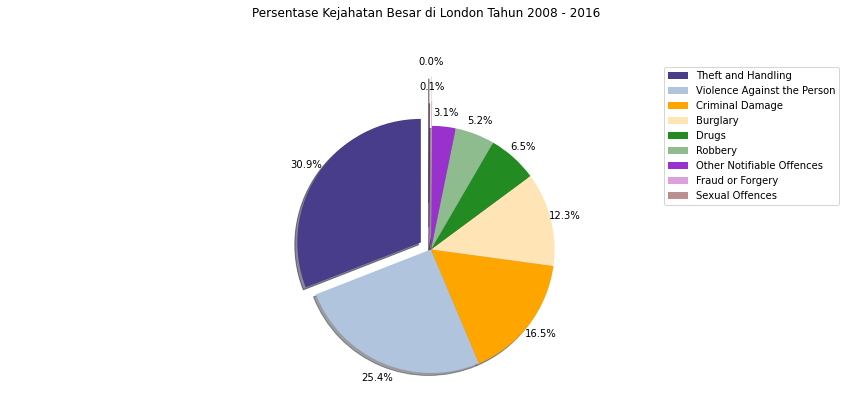

In [47]:
colors_list = ['darkslateblue','lightsteelblue','orange','moccasin','forestgreen','darkseagreen','darkorchid','plum','rosybrown']
explode_list = [0.1, 0, 0, 0, 0, 0, 0, 0.2, 0.4]
dfpie = df1.groupby(['major_category']).sum()['value'].sort_values(ascending=False)
dfpie.plot(kind='pie',
           figsize=(15, 6),
           autopct='%1.1f%%',
           startangle=90,
           shadow=True,
           labels=None, 
           colors=colors_list,
           pctdistance=1.12,
           explode=explode_list
          )
plt.title('Persentase Kejahatan Besar di London Tahun 2008 - 2016', y=1.12)
plt.ylabel('')
plt.axis('equal')

plt.legend(labels=dfpie.index, loc='upper right')

plt.show()

Persentase paling besar pada kategori kejahatan besar di London tahun 2008 - 2016 adalah 30.9%

## Box Plots

<b>Soal:</b> Maksimal kasus kekerasan di London

<AxesSubplot:>

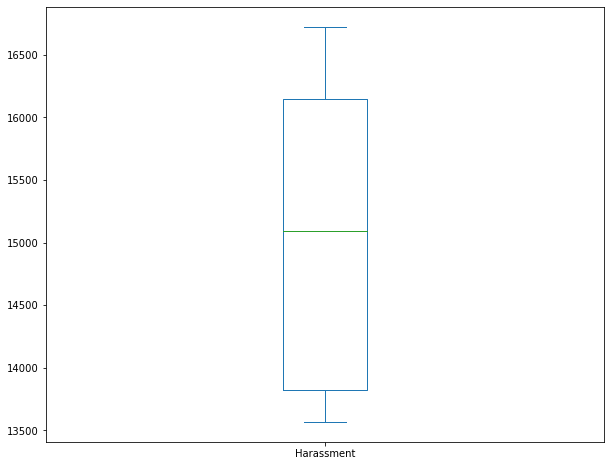

In [48]:
harassment = minor['Harassment']
harassment.plot(kind='box', figsize=(10, 8))

Dapat disimpulkan bahwa kasus kekerasan di London terjadi maksimal 17000 kasus

## Scatter Plots

<b>Soal:</b> Perbandingan antara Theft and Handling dan Criminal Damage di London tahun 2008 - 2016

In [49]:
dfscatter = major[['Theft and Handling','Criminal Damage']]
dfscatter = dfscatter.reset_index()
dfscatter

major_category  year  Theft and Handling  Criminal Damage
0               2008               72182            44774
1               2009               72672            43518
2               2010               72437            41800
3               2011               74065            40220
4               2012               74317            37425
5               2013               72411            34805
6               2014               73009            36118
7               2015               74252            37394
8               2016               77034            37715

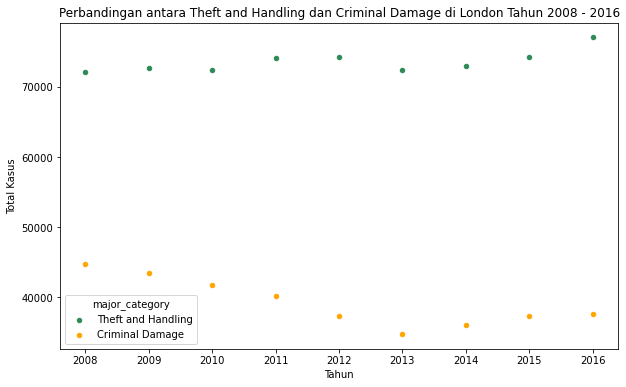

In [50]:
ax1 = dfscatter.plot(kind='scatter', x='year', y='Theft and Handling', figsize=(10, 6), color='seagreen', label='Theft and Handling')
ax2 = dfscatter.plot(kind='scatter', x='year', y='Criminal Damage', figsize=(10, 6), color='orange',label='Criminal Damage', ax=ax1 )

plt.title('Perbandingan antara Theft and Handling dan Criminal Damage di London Tahun 2008 - 2016')
plt.xlabel('Tahun')
plt.ylabel('Total Kasus')

plt.show()

Dapat disimpulkan bahwa kasus Theft and Handling memiliki total kasus lebih dari 70000 tiap tahunnya. Sedangkan Criminal Damage memiliki total kasus kurang dari 50000 tiap tahunnya.

## Word Clouds

In [51]:
from wordcloud import WordCloud, STOPWORDS
stopwords=set(STOPWORDS)

In [52]:
databorough = ' '.join(df1.borough)

In [53]:
borough_wc = WordCloud(
background_color='white',
max_words=100,
stopwords=stopwords
)

# generate the word cloud
borough_wc.generate(databorough)

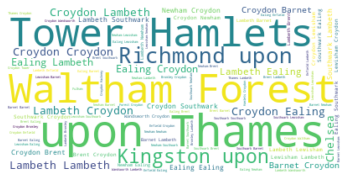

In [54]:
plt.imshow(borough_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [55]:
dataminor = ' '.join(df1.minor_category)

In [56]:
london_mask = np.array(Image.open('london_mask.png'))

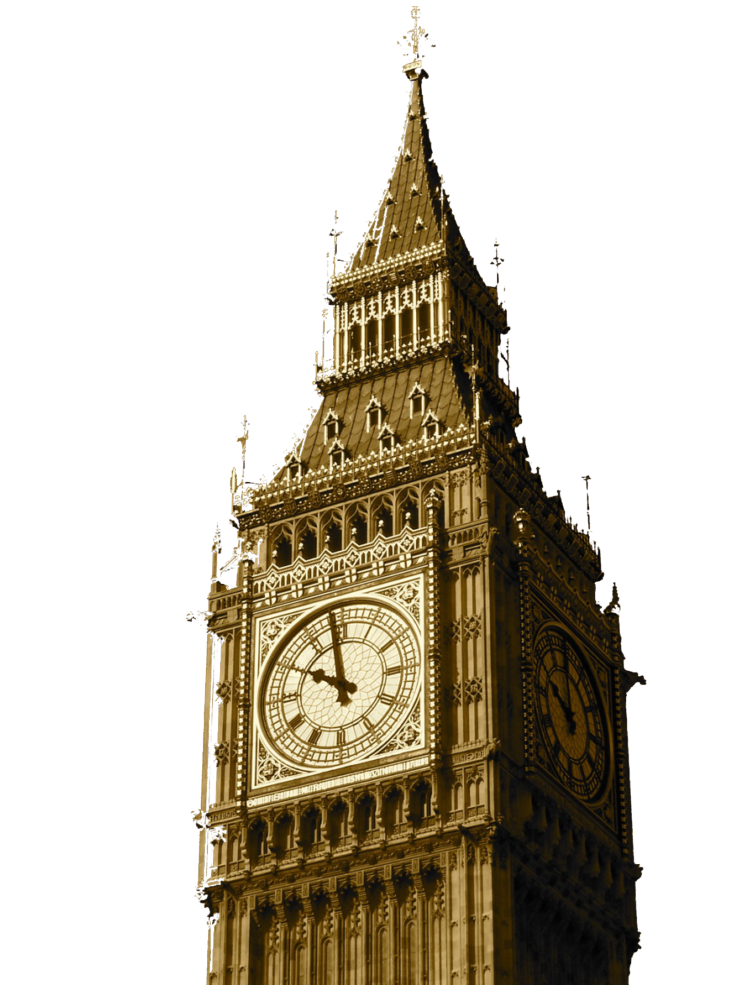

In [57]:
fig=plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(london_mask,cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

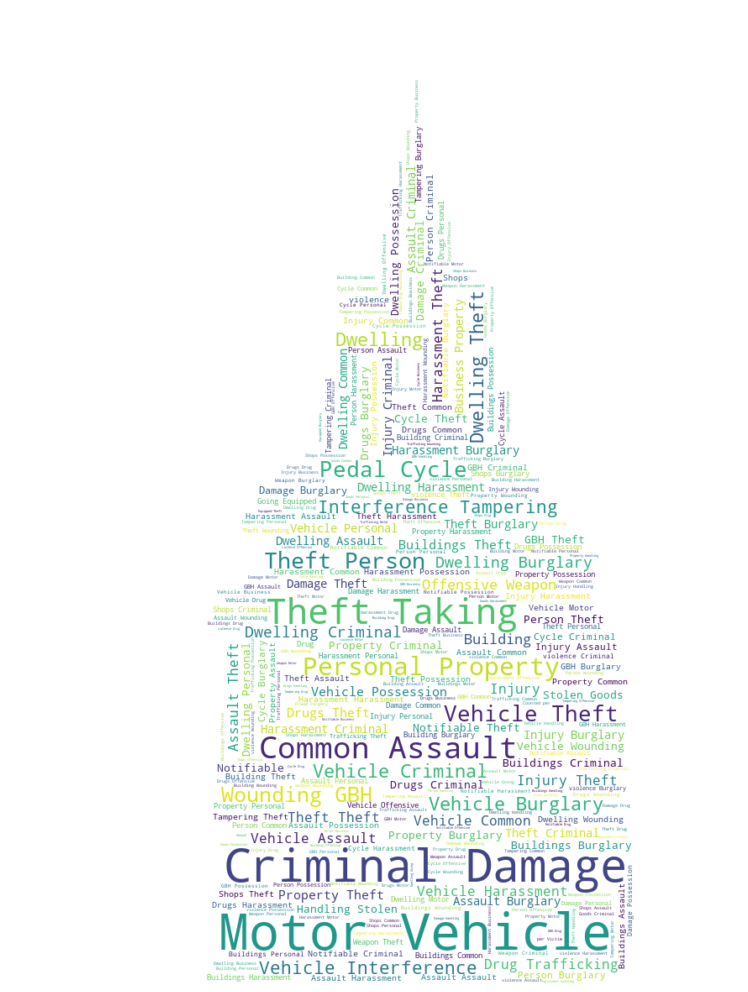

In [58]:
minor_wc = WordCloud(background_color='white', max_words=300,
                    mask=london_mask, stopwords=stopwords)

minor_wc.generate(dataminor)

fig=plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(minor_wc,interpolation='bilinear')
plt.axis('off')
plt.show()

## Folium Maps

In [59]:
latitude = 51.50
longitude = -0.136

In [60]:
london_map = folium.Map(location=[latitude,longitude], zoom_start=12)
london_map

In [61]:
london_map = folium.Map(location=[latitude,longitude], zoom_start=12, tiles='Stamen Toner')
london_map

## Kesimpulan

Dari visualisasi data London Crime by LSOA dapat ditarik beberapa kesimpulan sebagai berikut:
<br>
1. Kasus kejahatan besar di London yang paling sering terjadi dari tahun 2008 sampai 2016 adalah Theft and Handling dengan total kasus per tahun lebih dari 60000. Sedangkan kasus kejahatan besar paling sedikit adalah Sexual Offences.
2. Kasus kejahatan kecil di London yang paling sering terjadi adalah Burglary in a Dwelling. Sedangkan yang paling sedikit adalah Rape.
3. Pada tahun 2016, kejahatan di Kota London paling sering terjadi pada bulan ke 9 dan paling sedikit terjadi di bulan pertama.
4. Croydon menjadi wilayah dengan kasus kejahatan terbanyak di London dengan total keseluruhan lebih dari 90000 kasus.